### 1.2.1 Пример

Необходимо разработать виртуальную модель процесса обучения. В   
программе должны быть объекты-ученики, учитель, кладезь знаний.  

Потребуется три класса – "учитель", "ученик", "данные". Учитель и  
ученик во многом похожи, оба – люди. Значит, их классы могут  
принадлежать одному надклассу "человек". Однако в контексте данной  
задачи у учителя и ученика вряд ли найдутся общие атрибуты. Определим,  
что должны уметь объекты для решения задачи "увеличить знания":

* Ученик должен уметь брать информацию и превращать ее в свои  
знания.  
* Учитель должен уметь учить группу учеников.  
* Данные могут представлять собой список знаний. Элементы будут  
извлекаться по индексу.

In [9]:
class Data:
    def __init__(self, *info):
        self.info = list(info)
    def __getitem__(self, i):
        return self.info[i]

class Teacher:
    def teach(self, info, *pupil):
        for i in pupil:
            i.take(info)

class Pupil:
    def __init__(self):
        self.knowledge = []
    def take(self, info):
        self.knowledge.append(info)

lesson = Data('class', 'object', 'inheritance', 'polymorphism', 'encapsulation')
marIvanna = Teacher()
vasy = Pupil()
pety = Pupil()
marIvanna.teach(lesson[2], vasy, pety)
marIvanna.teach(lesson[0], pety)
print(vasy.knowledge)
print(pety.knowledge)

['inheritance']
['inheritance', 'class']


### 1.2.2 Пример 

Напишите программу по следующему описанию. Есть класс "Воин". От  
него создаются два экземпляра-юнита. Каждому устанавливается здоровье  
в 100 очков. В случайном порядке они бьют друг друга. Тот, кто бьет,  
здоровья не теряет. У того, кого бьют, оно уменьшается на 20 очков от  
одного удара. После каждого удара надо выводить сообщение, какой юнит  
атаковал, и сколько у противника осталось здоровья. Как только у кого-то  
заканчивается ресурс здоровья, программа завершается сообщением о том,  
кто одержал победу.

In [3]:
import random
class Warrior:
    def __init__(self, health):
        self.health = health
        
    def hit(self, target, target1):
        if target.health > 0:
            target.health -= 20
        if target1 == warrior1:
            target1 = "Warrior1"
        if target1 == warrior2:
            target1 = "Warrior2"
        print(target1, " has attacked")
        print(target.health, " left")
        if target.health == 0:
            print(target1, " has won")
            
warrior1 = Warrior(100)
warrior2 = Warrior(100)
q = int(input("Enter 1 to attack. Enter 2 to stop programm"))
while q != 2:
    if q == 1:
        j = random.randint(1, 3)
        if j % 2 == 0:
            warrior1.hit(warrior2, warrior1)
            q = int(input("Enter 1 to let some warrior attack:"))
        else:
            warrior2.hit(warrior1, warrior2)
            q = int(input("Enter 1 to let some warrior attack:"))
    else:
        print("Wrong input.")
        break

Enter 1 to attack. Enter 2 to stop programm1
Warrior1  has attacked
80  left
Enter 1 to let some warrior attack:1
Warrior1  has attacked
60  left
Enter 1 to let some warrior attack:1
Warrior1  has attacked
40  left
Enter 1 to let some warrior attack:1
Warrior1  has attacked
20  left
Enter 1 to let some warrior attack:1
Warrior1  has attacked
0  left
Warrior1  has won
Enter 1 to let some warrior attack:1
Warrior2  has attacked
80  left
Enter 1 to let some warrior attack:1
Warrior1  has attacked
0  left
Warrior1  has won
Enter 1 to let some warrior attack:1
Warrior2  has attacked
60  left
Enter 1 to let some warrior attack:1
Warrior2  has attacked
40  left
Enter 1 to let some warrior attack:2


### 1.2.3 Пример

Создайте класс по работе с дробями. В классе должна быть  
реализована следующая функциональность:  
- сложение дробей;  
- вычитание дробей;  
- умножение дробей;  
- деление дробей.

In [20]:
class Rational:
    
    @staticmethod
    def gcd(a, b):
        while (b != 0):
            (a, b) = (b, a % b)
        return a
    
    @staticmethod
    def sgn(x):
        if x > 0:
            return 1
        elif x < 0:
            return -1
        else:
            return 0
    
    def __init__(self, n, d):
        if n == 0:
            self.num = 0
            self.den = 1
        else:
            z = self.sgn(n) * self.sgn(d)
            n = abs(n)
            d = abs(d)
            k = self.gcd(n, d)
            self.num = z * n // k
            self.den = d // k
    
    def __str__(self):
        if self.num == 0:
            return "0"
        else:
            return str(self.num) + "/" + str(self.den)
    
    def __add__(self, o):
        n1 = self.num
        d1 = self.den
        if type(o) == int:
            n2 = o
            d2 = 1
        else:
            n2 = o.num
            d2 = o.den
        n = n1 * d2 + n2 * d1
        d = d1 * d2
        return Rational(n, d)
    
    def __radd__(self, o):
        n1 = self.num
        d1 = self.den
        if type(o) == int:
            n2 = o
            d2 = 1
        else:
            n2 = o.num
            d2 = o.den
        n = n1 * d2 + n2 * d1
        d = d1 * d2
        return Rational(n, d)
    
    def __sub__(self, o):
        n1 = self.num
        d1 = self.den
        n2 = o.num
        d2 = o.den
        n = n1 * d2 - n2 * d1
        d = d1 * d2
        return Rational(n , d)
    
    def __mul__(self, o):
        n1 = self.num
        d1 = self.den
        n2 = o.num
        d2 = o.den
        n = n1 * n2
        d = d1 * d2
        return Rational(n, d)
    
    def __floordiv__(self, o):
        n1 = self.num
        d1 = self.den
        n2 = o.num
        d2 = o.den
        n = n1 * d2
        d = d1 * n2
        return Rational(n, d)
    
d1 = Rational(1, 2)
d2 = Rational(1, 3)
d3 = d1 + d2
print(d3)
d4 = d1 - d2
print(d4)
d5 = d1 * d2
print(d5)
d6 = d1 * d2
print(d6)
d7 = d1 // d2
print(d7)
d8 = 6 + d1
print(d8)


5/6
1/6
1/6
1/6
3/2
13/2


### Задание

Создайте класс по работе с тригонометрическими функциями. В классе  
должны быть реализованы функции вычисления:  
- косинуса;  
- синуса;  
- тангенса;  
- арксинуса;  
- арккосинуса;  
- арктангенса;  
- перевода из градусов в радианы.

### 1.2.1 Пример

Определите класс бинарного дерева и задайте его объекты с отдельным  
атрибутом для каждого из потомков.

In [21]:
class Tree:
    def __init__(self, left, right):
        self.left = left
        self.right = right
        
t = Tree(Tree("a", "b"), Tree("c", "d"))
t.right.left

'c'

### 1.2.2 Пример

Для обозначения отсутствующих потомков можно использовать None  
(в случае если у узла только один потомок). Само собой, можно  
комбинировать разные методы (например, использовать списки или  
множества потомков для каждого узла).  

Распространенный способ реализации деревьев, особенно на языках,  
не имеющих встроенной поддержки списков, это так называемое  
представление «первый потомок, следующий брат». В нем каждый узел  
имеет два «указателя» или атрибута, указывающих на другие узлы, как в  
бинарном дереве. Однако, первый из этих атрибутов ссылается на первого  
потомка узла, а второй — на его следующего брата (т.е. узел, имеющий  
того же родителя, но находящийся правее, — прим. перев). Иными  
словами, каждый узел дерева имеет указатель на связанный список его  
потомков, а каждый из этих потомков ссылается на свой собственный  
аналогичный список. Таким образом, небольшая модификация бинарного  
дерева даст нам многопутевое дерево, показанное в листинге ниже.  

In [22]:
class Tree:
    def __init__(self, kids, next=None):
        self.kids = self.val = kids
        self.next = next

t = Tree(Tree("a", Tree("b", Tree("c", Tree("d")))))
t.kids.next.next.val

'c'

### Задание

Представьте дерево показанное на рисунке с использованием списка из  
списков. Выведите на печать корень дерева, а также его левое и правое  
поддеревья.  
![](tree1.jpg)

### Задание

Дан класс, описывающий бинарное дерево.  

`class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
    def PrintTree(self):
        print(self.data)`  

Реализуйте в классе функцию для вставки нового элемента в дерево по  
следующим правилам:
* Левое поддерево узла содержит только узлы со значениями меньше,  
чем значение в узле.  
* Правое поддерево узла содержит только узлы со значениями меньше,  
чем значение в узле.  
* Каждое из левого и правого поддеревьев также должно быть  
бинарным деревом поиска.  
* Не должно быть повторяющихся узлов.  

Метод вставки сравнивает значение узла с родительским узлом и решает  
куда доваить элемент (в левое или правое поддерево). Перепишите, метод  
PrintTree для печати полной версии дерева.

### 1.3.1 Пример

Построим дерево решений для задачи классификации, для этого, построим  
границу решения для каждого класса. В качестве данных будем  
использовать уже знакомый нам и встроенный в библиотеку sklearn набор  
данных ирисов Фишера. Импортируем библиотеки, набор данных и  
посмотрим его характеристики.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = sns.load_dataset('iris')
print(dataset)
print(dataset.shape)
print(dataset.head)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
(150, 5)
<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5          

Далее, разделим наши данные на атрибуты и метки, а затем выделим в  
общей совокупности полученных данных обучающие и тестовые наборы.  
Таким образом, мы можем обучить наш алгоритм на одном наборе данных,  
а затем протестировать его на совершенно на другом наборе, который  
алгоритм еще не видел. Это дает вам более точное представление о том,  
как на самом деле будет работать ваш обученный алгоритм.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    # поскольку iris это pandas-таблица, для нее нужно указывать iloc
    dataset.iloc[:, : -1], # берем все колонки кроме последней в признаки
    dataset.iloc[:, -1], # последнюю в целевую переменную (класс)
    test_size = 0.20 # размер тестовой выборки 20%
)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train.head())
print(y_train.head())

(120, 4) (30, 4) (120,) (30,)
     sepal_length  sepal_width  petal_length  petal_width
38            4.4          3.0           1.3          0.2
13            4.3          3.0           1.1          0.1
29            4.7          3.2           1.6          0.2
15            5.7          4.4           1.5          0.4
141           6.9          3.1           5.1          2.3
38        setosa
13        setosa
29        setosa
15        setosa
141    virginica
Name: species, dtype: object


После того, как данные были разделены на обучающие и тестовые наборы,  
последний шаг состоит в том, чтобы обучить алгоритм дерева решений на  
этих данных и сделать прогнозы. Scikit-Learn содержит библиотеку tree,  
которая содержит встроенные классы/методы для различных алгоритмов  
дерева решений. Поскольку мы собираемся выполнить здесь задачу  
классификации, мы будем использовать класс DecisionTreeClassifier для  
этого примера. Метод fit этого класса вызывается для обучения алгоритма  
на обучающих данных, которые передаются в качестве параметра методу  
fit . Выполним следующий сценарий для обучения алгоритма.

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [40, 38, 42]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.499\nsamples = 80\nvalue = [0, 38, 42]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.6\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

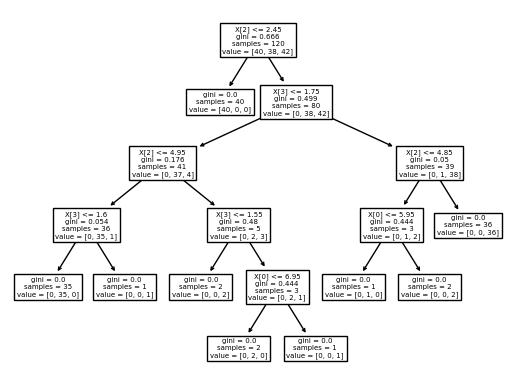

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

# построим дерево решений
from sklearn import tree
tree.plot_tree(classifier)

Теперь, когда наш классификатор обучен, давайте сделаем прогнозы по  
тестовым данным. Для составления прогнозов используется метод predict  
класса Decision Tree Classifier. Взгляните на следующий код для  
использования.

In [12]:
y_pred = classifier.predict(x_test)
y_pred

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor'], dtype=object)

На данный момент мы обучили наш алгоритм и сделали некоторые  
прогнозы. Теперь посмотрим, насколько точен наш алгоритм. Для задач  
классификации обычно используются такие метрики, как матрица  
путаницы, точность. Библиотека Scikit-Learn metrics содержит методы  
classification_report и confusion_matrix, которые могут быть использованы  
для расчета этих метрик.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Из матрицы оценок алгоритма вы можете видеть, что из 30 тестовых  
экземпляров наш алгоритм неправильно классифицировал только 3. Это  
приблизительно 91 % точности.

### Задание

Постройте классификатор на основе дерева принятия решений  
следующего датасета  
`# данные
x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]`

### 1.4.1 Пример

Постойте регрессию с использованием дерева решений, реализованного в  
Python.

(30, 2)
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


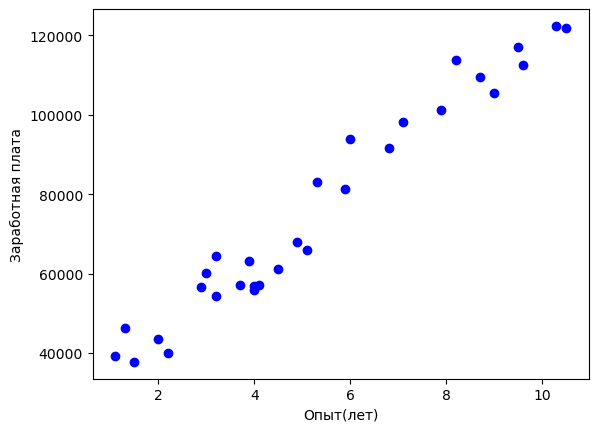

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
DecisionTreeRegressor()
[Text(0.4956896551724138, 0.9375, 'X[0] <= 5.2\nsquared_error = 614737637.832\nsamples = 24\nvalue = 73886.208'), Text(0.20689655172413793, 0.8125, 'X[0] <= 2.55\nsquared_error = 81200345.857\nsamples = 14\nvalue = 54976.0'), Text(0.06896551724137931, 0.6875, 'X[0] <= 1.2\nsquared_error = 7820714.0\nsamples = 4\nvalue = 42241.0'), Text(0.034482758620689655, 0.5625, 'squared_error = 0.0\nsamples = 1\nvalue = 39343.0'), Text(0.10344827586206896, 0.5625, 'X[0] <= 2.1\nsquared_error = 6694

5.421715809463662

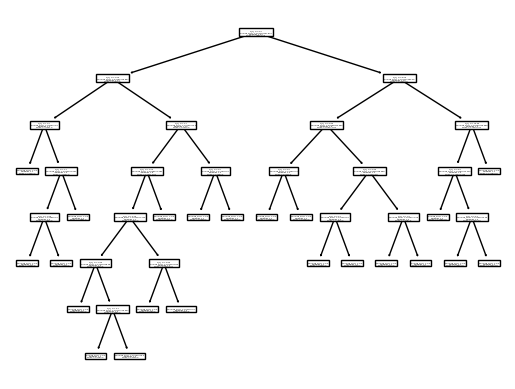

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
dataset.head()

# Исследуем набор данных
print(dataset.shape)
print(dataset.describe())

# Нарисуем точечную диаграмму
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='b', label="Заработная плата")
plt.xlabel("Опыт(лет)")
plt.ylabel("Заработная плата")
plt.show()

from sklearn.tree import DecisionTreeRegressor
x = dataset.iloc[:, : -1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

# Теперь, когда у нас есть атрибуты и метки, необходимо разделить хи на обучающий  и тестовый наборы
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на нбор тестов
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = DecisionTreeRegressor()
print(regressor.fit(x_train, y_train))

from sklearn import tree
print(tree.plot_tree(regressor))

# Построим прогноз
y_pred = regressor.predict(x_test)
print(y_pred)

# Теперь сравним некоторые из наших прогнозируемых значений с фактическими значениями
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

# Рассчитаем среднюю абсолютную и среднеквадратичную ошибку регрессии
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

Средняя абсолютная ошибка для нашего алгоритма составляет 4120.66,  
что составляет менее 6 процентов от среднего значения всех значений в  
столбце.

### Задание

Постройте модель регрессии для данных из предыдущей рабочей  
тетради.Для примера можно взять потребления газа (в миллионах  
галлонов) в 48 штатах США или набор данных о качестве красного вина:  
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv  
https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv  
Постройте прогноз. Оцените точность модели.